# Data Description

In [1]:
######################################################
# Source:
  
# Kelwin Fernandes (kafc _at_ inesctec _dot_ pt) - INESC TEC & FEUP, Porto, Portugal. 
# Jaime S. Cardoso - INESC TEC & FEUP, Porto, Portugal. 
# Jessica Fernandes - Universidad Central de Venezuela, Caracas, Venezuela.
# 
# 
# Data Set Information:
#   
#   The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. 
#   The dataset comprises demographic information, habits, and historic medical records of 858 patients. 
#   Several patients decided not to answer some of the questions because of privacy concerns (missing values).
# 
# 
# Attribute Information:
#   
# (int) Age 
# (int) Number of sexual partners 
# (int) First sexual intercourse (age) 
# (int) Num of pregnancies 
# (bool) Smokes 
# (bool) Smokes (years) 
# (bool) Smokes (packs/year) 
# (bool) Hormonal Contraceptives 
# (int) Hormonal Contraceptives (years) 
# (bool) IUD 
# (int) IUD (years) 
# (bool) STDs 
# (int) STDs (number) 
# (bool) STDs:condylomatosis 
# (bool) STDs:cervical condylomatosis 
# (bool) STDs:vaginal condylomatosis 
# (bool) STDs:vulvo-perineal condylomatosis 
# (bool) STDs:syphilis 
# (bool) STDs:pelvic inflammatory disease 
# (bool) STDs:genital herpes 
# (bool) STDs:molluscum contagiosum 
# (bool) STDs:AIDS 
# (bool) STDs:HIV 
# (bool) STDs:Hepatitis B 
# (bool) STDs:HPV 
# (int) STDs: Number of diagnosis 
# (int) STDs: Time since first diagnosis 
# (int) STDs: Time since last diagnosis 
# (bool) Dx:Cancer 
# (bool) Dx:CIN 
# (bool) Dx:HPV 
# (bool) Dx 
# (bool) Hinselmann: target variable 
# (bool) Schiller: target variable 
# (bool) Cytology: target variable 
# (bool) Biopsy: target variable
######################################################

# 1. Prepare Environment

In [2]:
library(ggplot2)
library(ggcorrplot)
library(ggalt)
library(ggfortify)
library(ggrepel)
library(ggthemes)

library(repr)
library(IRdisplay)

In [3]:
data = read.csv(file = "Datasets\\risk_factors_cervical_cancer.csv", header = TRUE, sep = ",")

# 2. Investigate the Content of Dataset

In [4]:
print(paste0("Number of rows: ", dim(data)[1]))
print(paste0("Number of columns: ", dim(data)[2]))
print("---------------------------------------------------------------")

print(summary(data)[1:7,1:5])

[1] "Number of rows: 858"
[1] "Number of columns: 36"
[1] "---------------------------------------------------------------"
      Age        Number.of.sexual.partners First.sexual.intercourse
 Min.   :13.00   2.0    :272               15.0   :163             
 1st Qu.:20.00   3.0    :208               17.0   :151             
 Median :25.00   1.0    :206               18.0   :137             
 Mean   :26.82   4.0    : 78               16.0   :121             
 3rd Qu.:32.00   5.0    : 44               14.0   : 79             
 Max.   :84.00   ?      : 26               19.0   : 60             
                 (Other): 24               (Other):147             
 Num.of.pregnancies Smokes   
 1.0    :270        ?  : 13  
 2.0    :240        0.0:722  
 3.0    :139        1.0:123  
 4.0    : 74                 
 ?      : 56                 
 5.0    : 35                 
 (Other): 44                 


#### Comments: 
- There are several columns with missing values marked as "?"

In [5]:
print(str(data, vec.len = 2))

'data.frame':	858 obs. of  36 variables:
 $ Age                               : int  18 15 34 52 46 ...
 $ Number.of.sexual.partners         : Factor w/ 13 levels "?","1.0","10.0",..: 8 2 2 9 7 ...
 $ First.sexual.intercourse          : Factor w/ 22 levels "?","10.0","11.0",..: 7 6 1 8 13 ...
 $ Num.of.pregnancies                : Factor w/ 12 levels "?","0.0","1.0",..: 3 3 3 8 8 ...
 $ Smokes                            : Factor w/ 3 levels "?","0.0","1.0": 2 2 2 3 2 ...
 $ Smokes..years.                    : Factor w/ 31 levels "?","0.0","0.16",..: 2 2 2 25 2 ...
 $ Smokes..packs.year.               : Factor w/ 63 levels "?","0.0","0.001",..: 2 2 2 51 2 ...
 $ Hormonal.Contraceptives           : Factor w/ 3 levels "?","0.0","1.0": 2 2 2 3 3 ...
 $ Hormonal.Contraceptives..years.   : Factor w/ 41 levels "?","0.0","0.08",..: 2 2 2 31 22 ...
 $ IUD                               : Factor w/ 3 levels "?","0.0","1.0": 2 2 2 2 2 ...
 $ IUD..years.                       : Factor w/ 27 levels 

### Comments: 
- Bool variables, such as "Dx.Cancer", "Hinselmann", etc. are currently  of integer type.
- Other Variables, such as "Smokes..years." are of Factor type, while they shold be integers


# 3. Data Preprocessing

## 3.1 Refactor Missing Data 

In [6]:
#-- Replace "?" with more proper missing value naming: "NA"
data_mv = data
for(name in names(data_mv)){
  if(class(data_mv[ , name]) == "factor"){
    levels(data_mv[ , name])[match("?",levels(data_mv[ , name]))] <- NA
  }
}
data_mv[1:5,1:5]

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes
18,4.0,15.0,1.0,0.0
15,1.0,14.0,1.0,0.0
34,1.0,NA,1.0,0.0
52,5.0,16.0,4.0,1.0
46,3.0,21.0,4.0,0.0


## 3.2 Fix Data Types 

In [7]:
data_typeFixed = data_mv

names_toInteger = c("Number.of.sexual.partners", "First.sexual.intercourse", "Num.of.pregnancies", "Smokes..years.",
                    "Smokes..packs.year.", "Hormonal.Contraceptives..years.", "IUD..years.", "STDs..number.", "STDs..Time.since.first.diagnosis",
                    "STDs..Time.since.last.diagnosis")
names_toLogical = c("Smokes", "Hormonal.Contraceptives", "IUD", "STDs", "STDs.condylomatosis", "STDs.cervical.condylomatosis", "STDs.vaginal.condylomatosis", 
                    "STDs.vulvo.perineal.condylomatosis", "STDs.syphilis", "STDs.pelvic.inflammatory.disease", "STDs.genital.herpes",
                    "STDs.molluscum.contagiosum", "STDs.AIDS", "STDs.HIV", "STDs.Hepatitis.B", "STDs.HPV", "Dx.Cancer", "Dx.CIN", "Dx.HPV", "Dx", 
                    "Hinselmann", "Schiller", "Citology", "Biopsy")
for(name in names_toInteger){
  data_typeFixed[ , name] = as.integer(as.character(data_typeFixed[ , name]))
}
for(name in names_toLogical){
  data_typeFixed[ , name] = as.logical(as.integer(as.character(data_typeFixed[ , name])))
}
str(data_typeFixed)

'data.frame':	858 obs. of  36 variables:
 $ Age                               : int  18 15 34 52 46 42 51 26 45 44 ...
 $ Number.of.sexual.partners         : int  4 1 1 5 3 3 3 1 1 3 ...
 $ First.sexual.intercourse          : int  15 14 NA 16 21 23 17 26 20 15 ...
 $ Num.of.pregnancies                : int  1 1 1 4 4 2 6 3 5 NA ...
 $ Smokes                            : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ Smokes..years.                    : int  0 0 0 37 0 0 34 0 0 1 ...
 $ Smokes..packs.year.               : int  0 0 0 37 0 0 3 0 0 2 ...
 $ Hormonal.Contraceptives           : logi  FALSE FALSE FALSE TRUE TRUE FALSE ...
 $ Hormonal.Contraceptives..years.   : int  0 0 0 3 15 0 0 2 0 0 ...
 $ IUD                               : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ IUD..years.                       : int  0 0 0 0 0 0 7 7 0 NA ...
 $ STDs                              : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ STDs..number.                     : int  0 0 0 0 

## 3.3 Look for Outliers 

[1] "Example histogram"


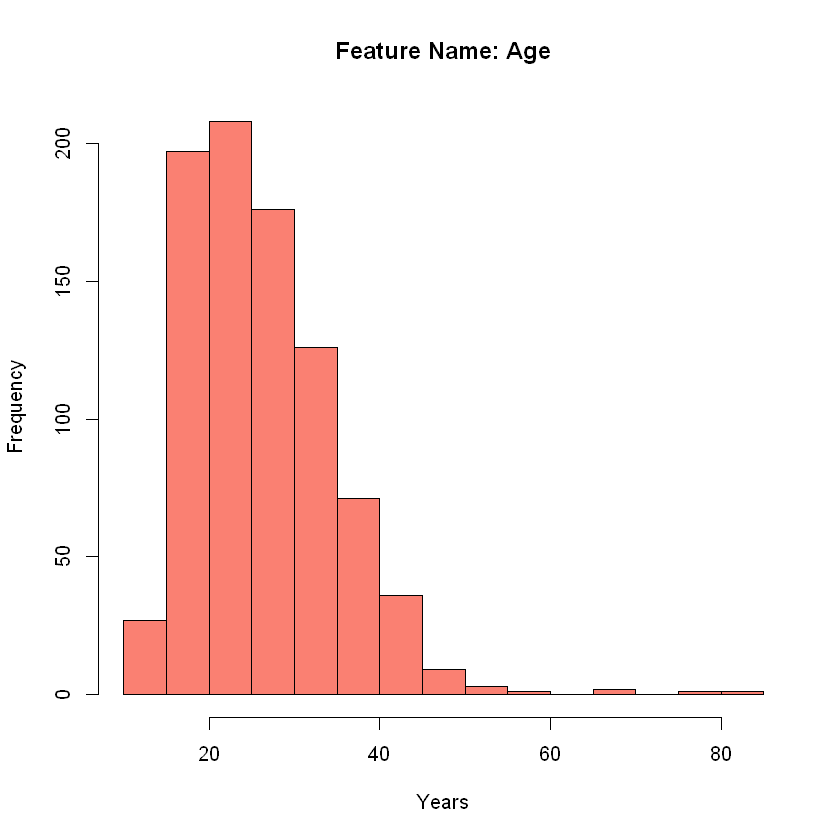

In [8]:
# for(name in names(data_typeFixed)){
#   if(class(data_typeFixed[, name]) == "integer"){
#     windows(width=9, height=6, pointsize=12) 
#     hist(data_typeFixed[, name], main = paste0("Feature Name: ", name), xlab = "")
#   }
# }
print("Example histogram")
hist(data_typeFixed[, "Age"], main = paste0("Feature Name: ", "Age"), xlab = "Years", col="salmon")

### Comments:
- No outliers (values that sem unreasonably high/low) have been observed in all the histograms.

## 3.4 Feature Engineering

### 3.4.1 Age Buckets  - divide patients into age groups, so that each group is of equal size

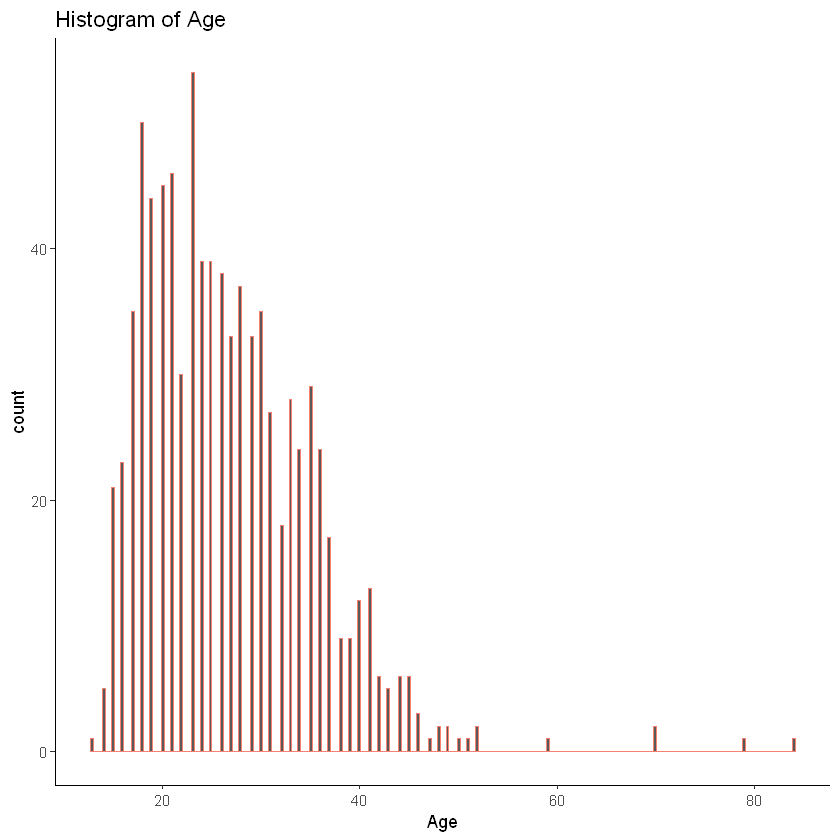

In [9]:
data_newFeatures = data_typeFixed

theme_set(theme_classic())
g1 <- ggplot(data_newFeatures, aes(Age))
g1 <-  g1 + geom_histogram(binwidth = .3, col = "salmon", size = .3) +
  labs(title="Histogram of Age")
g1

### Comments:
- One can see that the patients' age distribution is highly skewed to the right. Therfore there will be more Age-buckets in the lower end of the distribution (0 - 30 years old) and 1-2 buckets summing all patients whose age is 30+.

In [10]:
numberOfBuckets <- 5
bucketStep <- round(dim(data_newFeatures)[1]/numberOfBuckets)
bucketLimitsIndices <- seq(0, dim(data_newFeatures)[1], bucketStep)

bucketLimitsAges <- data_newFeatures[order(data_newFeatures$Age), "Age"][bucketLimitsIndices]
bucketLimitsAges <- c(1, bucketLimitsAges, Inf)


for(bucketNumber in 1:(length(bucketLimitsAges)-1)){
  data_newFeatures$Age.bucket[  data_newFeatures$Age > bucketLimitsAges[bucketNumber] & data_newFeatures$Age <= bucketLimitsAges[bucketNumber+1]   ] <- bucketNumber
}
print("Number of Datapoints assigned to each age bucket (1-5)")
table(data_newFeatures$Age.bucket)

[1] "Number of Datapoints assigned to each age bucket (1-5)"



  1   2   3   4   5 
179 175 186 165 153 

In [11]:
numberOfBuckets <- 20
bucketStep <- round(dim(data_newFeatures)[1]/numberOfBuckets)
bucketLimitsIndices <- seq(0, dim(data_newFeatures)[1], bucketStep)

bucketLimitsAges <- data_newFeatures[order(data_newFeatures$Age), "Age"][bucketLimitsIndices]
bucketLimitsAges <- c(1, bucketLimitsAges, Inf)


for(bucketNumber in 1:(length(bucketLimitsAges)-1)){
  data_newFeatures$Age.bucket.granular[  data_newFeatures$Age > bucketLimitsAges[bucketNumber] & data_newFeatures$Age <= bucketLimitsAges[bucketNumber+1]   ] <- bucketNumber
}
print("Number of Datapoints assigned to each age bucket (1-5)")
table(data_newFeatures$Age.bucket.granular)

[1] "Number of Datapoints assigned to each age bucket (1-5)"



 1  2  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 
50 85 44 45 46 84 39 39 71 37 33 35 45 52 29 41 43 40 

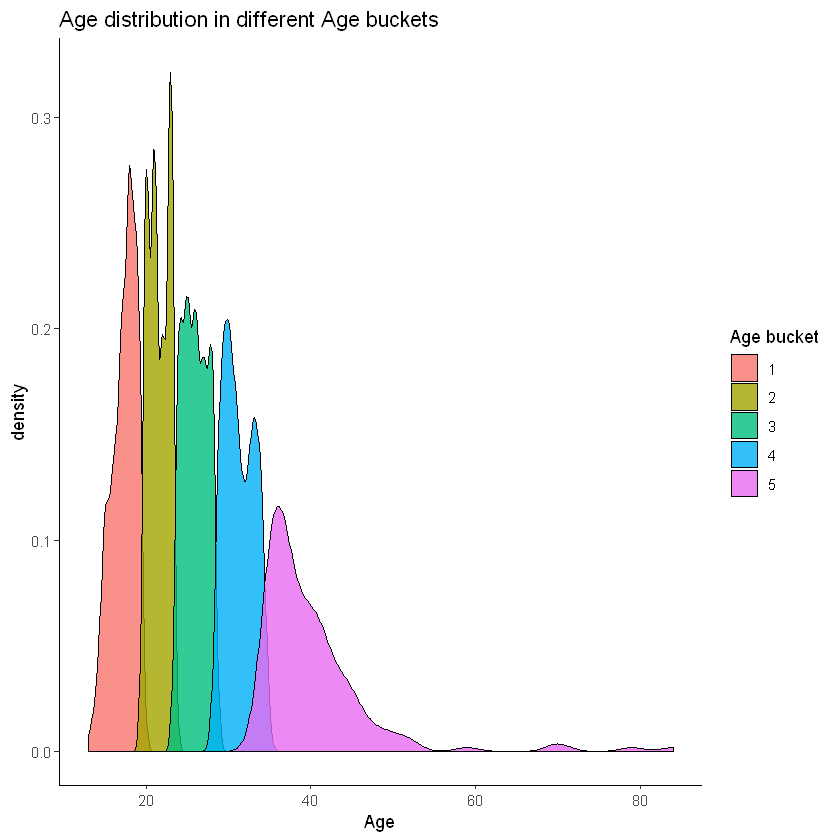

In [12]:
#-- Plot age distribution in each Bucket on one plot:
g <- ggplot(data_newFeatures, aes(Age))
g + geom_density(aes(fill=factor(Age.bucket)), alpha=0.8) +
    labs(title = "Age distribution in different Age buckets",
        x = "Age",
        fill = "Age bucket")



### Comments:
- We can observe that first 4 buckets have approx. the same width (they cover similar age spans). The 5th bucket comprises of People.
- Distributions of bucket 2, 3, 4 look pretty close to bimodial distribution and bucket 5 resembles poisson distrobution.
- Also 5th bucket is strongly skewed to the right, since there was only very few patients whose age was more than 50 years old.

### 3.4.2 Sum of the number of cancer indicators
#### There are 4 indicator given in the database, namely: 
- Hinselmann
- Schiller
- Citology
- Biopsy

In [13]:
data_newFeatures["Number.cancer.indicators"] <- apply(X = data_newFeatures[, c("Hinselmann", "Schiller", "Citology","Biopsy")], MARGIN=1, FUN=sum)

### 3.4.3 Age of the first diagnosis

In [14]:
data_newFeatures["Age.first.std.diagnosis"] <- data_newFeatures["Age"] - data_newFeatures["STDs..Time.since.first.diagnosis"]

### 3.4.5 Age of the first hormonal contraceptives 

In [15]:
data_newFeatures["Age.first.hormonal.contraceptives"] <- data_newFeatures["Age"] - data_newFeatures["Hormonal.Contraceptives..years."]

# 4. Visualizations
#### - Before attempting to build any models we would like to understand the dataset better, we may at low cost find useful information without deploying "heavy" algorithm-machines.
#### -  Insights from this part may be helpful in taking the data for the next steps of building prediction model.

## 4.1 Feature Correlations
- Let's see how each numerical feature affects the other

[1] "Number of patients for whom First Diagnosis was also their Last Diagnosis: 68"
[1] "Number of patients for whom First Diagnosis was NOT their Last Diagnosis: 3"


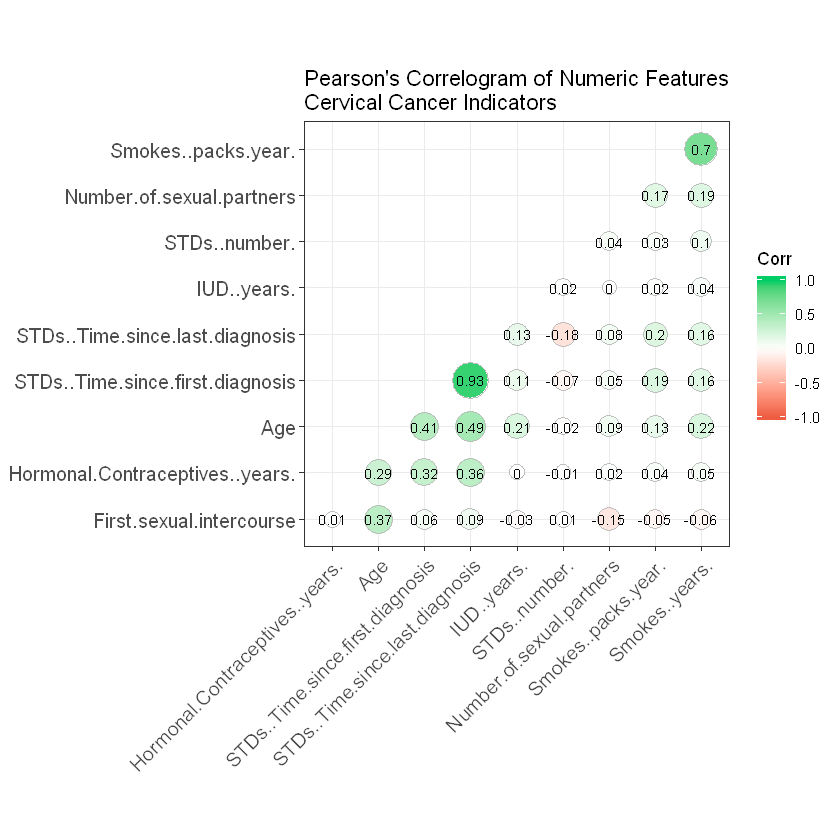

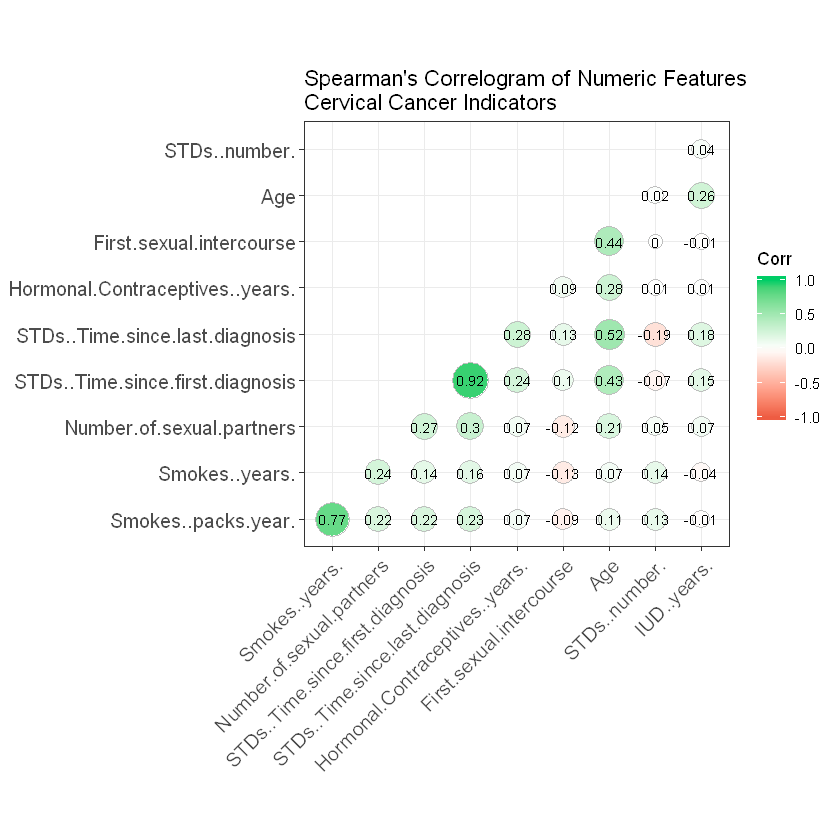

In [16]:
data_final <- data_newFeatures

numeric_features <- c("STDs..Time.since.first.diagnosis", "STDs..Time.since.last.diagnosis",
                      "STDs..number.", "IUD..years.", "Hormonal.Contraceptives..years.",
                      "Smokes..packs.year.", "Smokes..years.", "First.sexual.intercourse", 
                      "Number.of.sexual.partners", "Age")
corr_pearson <- cor(data_final[, numeric_features], use = "pairwise.complete.obs", method = "pearson")
g1 <- ggcorrplot(corr_pearson, hc.order = TRUE, type ="lower", lab = TRUE,
           lab_size = 3, method="circle", colors =c("tomato2", "white", "springgreen3"),
           title = "Pearson's Correlogram of Numeric Features\nCervical Cancer Indicators",
           ggtheme = theme_bw)

#-- Let's use Spearman correlation coef. in order to see whether there are any nonlinear relations that Pearson's algorithm couldn't catch out.
corr_spearman <- cor(data_final[, numeric_features], use = "pairwise.complete.obs", method = "spearman")

g2 <- ggcorrplot(corr_spearman, hc.order = TRUE, type ="lower", lab = TRUE,
           lab_size = 3, method="circle", colors =c("tomato2", "white", "springgreen3"),
           title = "Spearman's Correlogram of Numeric Features\nCervical Cancer Indicators",
           ggtheme = theme_bw)

print(paste0("Number of patients for whom First Diagnosis was also their Last Diagnosis: ", as.character(sum(data_final[, "STDs..Time.since.last.diagnosis"] == data_final[, "STDs..Time.since.first.diagnosis"], na.rm = T))))
print(paste0("Number of patients for whom First Diagnosis was NOT their Last Diagnosis: ",  as.character(sum(data_final[, "STDs..Time.since.last.diagnosis"] != data_final[, "STDs..Time.since.first.diagnosis"], na.rm = T))))

print(g1)
print(g2)

###  Comments:
- One can observe in both plots high correlation (Pearson-0.7, Spearman - 0.77) between number of years when a person smokes and number of smoke-packs a year. This might tell us, that the longer a person smokes, the more packs she wants to smoke as time passes by, indicating progressing addiction.
- The biggest correlation has been observed between features: "STDs..Time.since.last.diagnosis" and "STDs..Time.since.first.diagnosis" (Pearson-0.93, Spearman - 0.92). However it might be very misleading since for 68 out of 71 patients for whom data was available the first diagnosis was also the last diagnosis done. It might be beneficial for the possible prediction model to remove one of these features as it does not provide much new information in the dataset.
- Another interesting observation wasis that There is medium positive correlation between "First.sexual.intercourse" and "Age" (Pearson-0.37, Spearman - 0.44). It shows that the older is the patient, the later she had first sexual intercourse. It might be related with more "conservative" approach to sex in the past in the analyzed society. However it is not part of this particular study, therefore it won't be investigated any further.


## 4.2 Answering Questions with Plots

### 4.2.1 Does "Number of Sexual Partners" provide information on "Number of Indicators of a Cancer" ?

Warning message:
"Removed 26 rows containing non-finite values (stat_count)."Warning message:
"Removed 26 rows containing non-finite values (stat_count)."

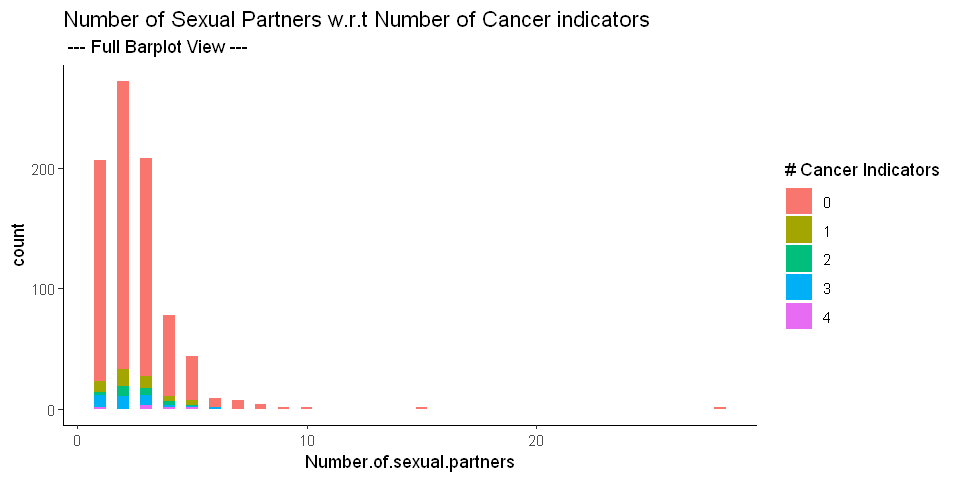

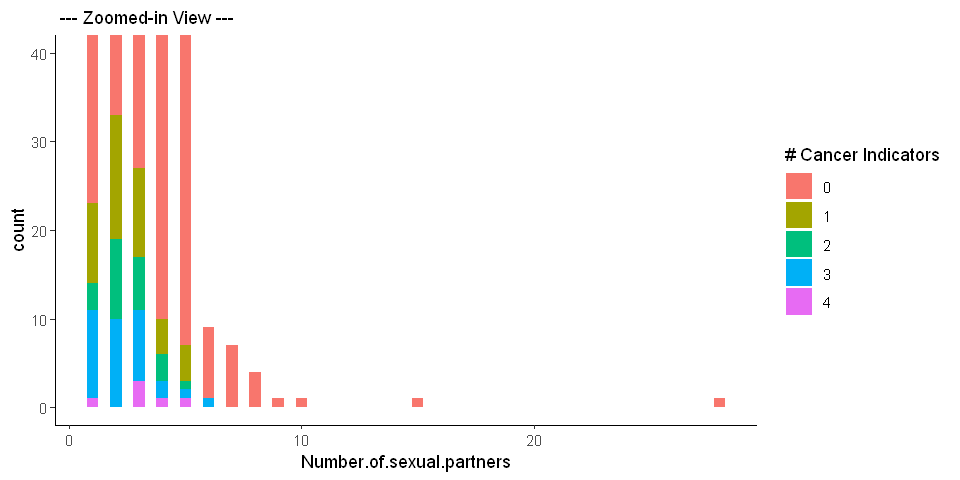

In [17]:
options(repr.plot.width=8, repr.plot.height=4)

theme_set(theme_classic())
g1 <- ggplot(data_final, aes(Number.of.sexual.partners)) +
    geom_bar(aes(fill=factor(Number.cancer.indicators)), width=0.5) +
    labs(title="Number of Sexual Partners w.r.t Number of Cancer indicators",
        subtitle=" --- Full Barplot View --- ", 
         fill="# Cancer Indicators")
g2 <- ggplot(data_final, aes(Number.of.sexual.partners)) +
    geom_bar(aes(fill=factor(Number.cancer.indicators)), width=0.5) +
    coord_cartesian(ylim=c(0, 40)) +
    labs(subtitle=" --- Zoomed-in View --- ", 
         fill="# Cancer Indicators")
plot(g1)
plot(g2)

### Comments:
- Proportions of Number of Cancer indicators depending on Number of sexual partner seems to be stable. We cannot therefore state that increased number of Sexual Partners leads to increased number of indicators.

### 4.2.2 What is the distribution  of the Time of Hormonal Contraceptives Usage in each separate Indicator Factor (Hinselmann, Schiller, Citology, Biopsy)

Warning message:
"New theme missing the following elements: panel.grid"Warning message:
"Ignoring unknown parameters: varwidth"Warning message:
"Ignoring unknown parameters: varwidth"Warning message:
"Ignoring unknown parameters: varwidth"Warning message:
"Ignoring unknown parameters: varwidth"Warning message:
"Removed 108 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 108 rows containing non-finite values (stat_ydensity)."

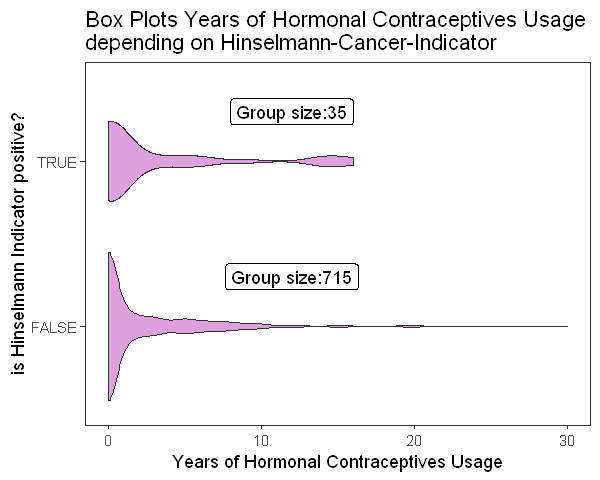

Warning message:
"Removed 108 rows containing non-finite values (stat_ydensity)."

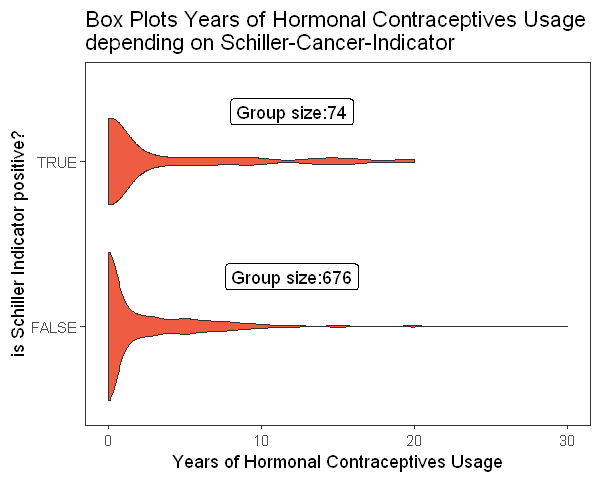

Warning message:
"Removed 108 rows containing non-finite values (stat_ydensity)."

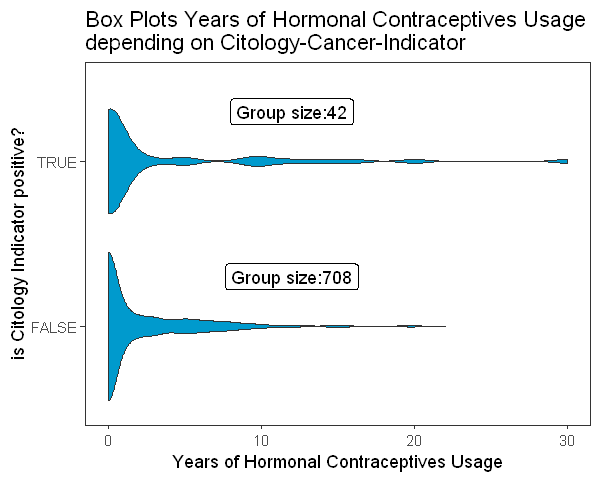

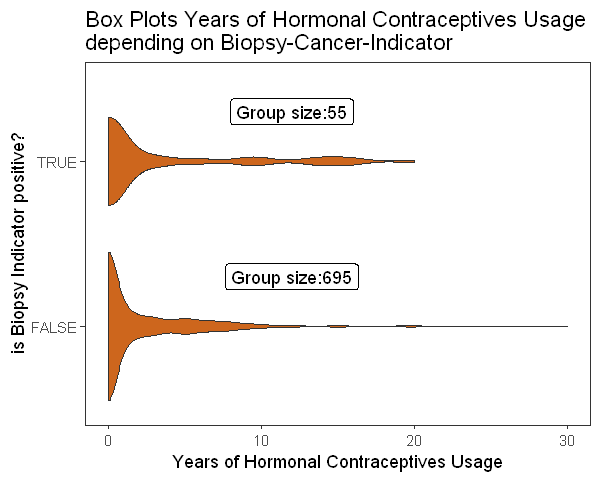

In [18]:
options(repr.plot.width=5, repr.plot.height=4)
theme_set(theme_test())
g_hinselmann <- ggplot(data_final, aes(Hinselmann, Hormonal.Contraceptives..years.)) +
    geom_violin(varwidth=TRUE, fill="plum") + 
    labs(title="Box Plots Years of Hormonal Contraceptives Usage\ndepending on Hinselmann-Cancer-Indicator",
         x="is Hinselmann Indicator positive?",
         y="Years of Hormonal Contraceptives Usage") +
    annotate("label", x=2.3, y=12, label=paste0("Group size:", sum(data_final$Hinselmann[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    annotate("label", x=1.3, y=12, label=paste0("Group size:", sum(!data_final$Hinselmann[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    
    coord_flip()

g_schiller <- ggplot(data_final, aes(Schiller, Hormonal.Contraceptives..years.)) +
    geom_violin(varwidth=TRUE, fill="tomato2") + 
    labs(title="Box Plots Years of Hormonal Contraceptives Usage\ndepending on Schiller-Cancer-Indicator",
         x="is Schiller Indicator positive?",
         y="Years of Hormonal Contraceptives Usage") +
    annotate("label", x=2.3, y=12, label=paste0("Group size:", sum(data_final$Schiller[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    annotate("label", x=1.3, y=12, label=paste0("Group size:", sum(!data_final$Schiller[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    coord_flip()

g_citology <- ggplot(data_final, aes(Citology, Hormonal.Contraceptives..years.)) +
    geom_violin(varwidth=TRUE, fill="deepskyblue3") + 
    labs(title="Box Plots Years of Hormonal Contraceptives Usage\ndepending on Citology-Cancer-Indicator",
         x="is Citology Indicator positive?",
         y="Years of Hormonal Contraceptives Usage") +
    annotate("label", x=2.3, y=12, label=paste0("Group size:", sum(data_final$Citology[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    annotate("label", x=1.3, y=12, label=paste0("Group size:", sum(!data_final$Citology[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    coord_flip()

g_biopsy <- ggplot(data_final, aes(Biopsy, Hormonal.Contraceptives..years.)) +
    geom_violin(varwidth=TRUE, fill="chocolate3") + 
    labs(title="Box Plots Years of Hormonal Contraceptives Usage\ndepending on Biopsy-Cancer-Indicator",
         x="is Biopsy Indicator positive?",
         y="Years of Hormonal Contraceptives Usage") +
    annotate("label", x=2.3, y=12, label=paste0("Group size:", sum(data_final$Biopsy[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    annotate("label", x=1.3, y=12, label=paste0("Group size:", sum(!data_final$Biopsy[!is.na(data_final$Hormonal.Contraceptives..years.)]))) +
    coord_flip()


plot(g_hinselmann)
plot(g_schiller)
plot(g_citology)
plot(g_biopsy)

### Comments:
- It looks like distributions have very similar shapes among all Cancer indicators when analyzed separately whether an indicator is positive or negative.
- At about 10 years of using hormonal contraceptives, proportion of patients with positive result (is *indicator* positive == TRUE) of Indicator's presence is greater than for patients with negative result(is *indicator* positive == FALSE).
- For each Indicator for patients who did not use contraceptives (Years of Hormonal Contraceptives Usage = 0) proportion of number of patients with positive result (is *indicator* positive == TRUE) is smaller than with negative result (is *indicator* positive == FALSE).

### 4.2.3 What is average Number of Pregnancies among patients without/with any Indicator being positive, with regards to Age ? (Consider Reproductive Age of Women)

Warning message:
"Removed 12 rows containing missing values (position_stack)."

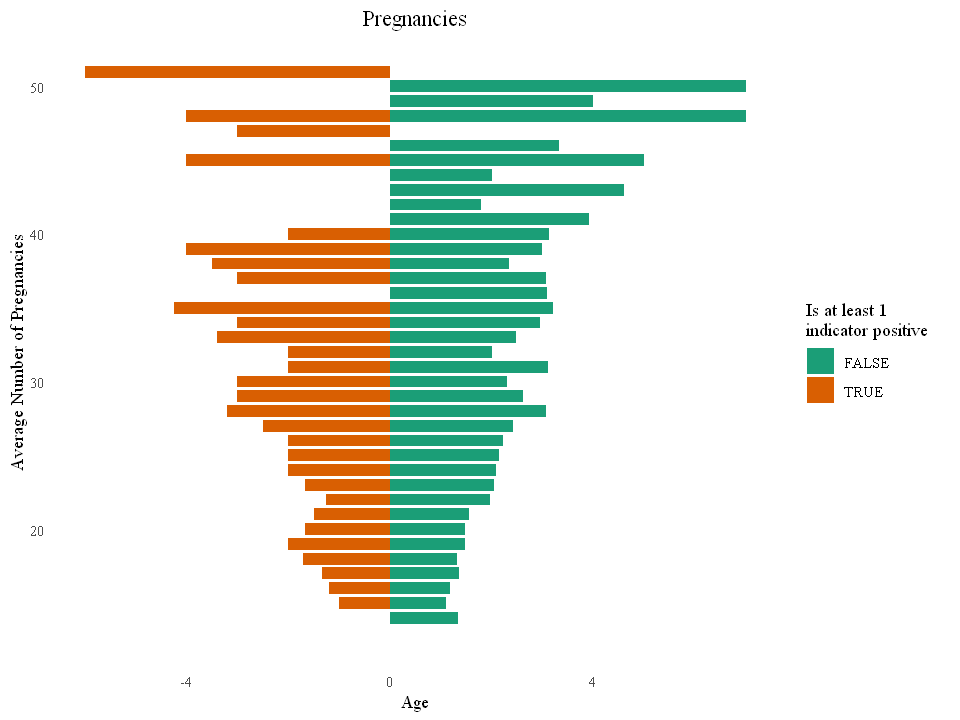

In [44]:
options(repr.plot.width=8, repr.plot.height=6)
data_pregnancies <- data.frame(age = character(), isIndicatorPositive = logical(), avgNumPregnancies = numeric())

menopauseAge <- 51

for(isIndicatorPositive in c(TRUE, FALSE) ){
    for(age in sort(unique(data_final$Age[data_final$Age <= menopauseAge]))){
        data_pregnancies <- rbind(data_pregnancies, data.frame(age = age,
                                                               isIndicatorPositive = isIndicatorPositive,
                                                               avgNumPregnancies = ifelse(isIndicatorPositive, 
                                                                                          mean(data_final$Num.of.pregnancies[data_final$Number.cancer.indicators >= 1 & data_final$Age == age]*-1, na.rm=TRUE), 
                                                                                          mean(data_final$Num.of.pregnancies[data_final$Number.cancer.indicators == 0 & data_final$Age == age], na.rm=TRUE)
                                                                                         )
                                                              )
                                  )
    }
}

                          
                          
brks <- seq(0, 800, 50)
lbls <- paste0(as.character(c(seq(750, 0, -50), 50 )))

g <- ggplot(data_pregnancies, aes(x = age, y = avgNumPregnancies, fill = isIndicatorPositive)) +
        geom_bar(stat="identity", width=0.8) +
        #scale_y_continuous(breaks=brks, labels = lbls) +
        coord_flip() +
        labs(title="Pregnancies",
             x = "Average Number of Pregnancies",
             y = "Age",
             fill = "Is at least 1\nindicator positive") + 
        theme_tufte() +
        theme(plot.title=element_text(hjust=0.5),
              axis.ticks=element_blank()) +
        scale_fill_brewer(palette="Dark2")

g

### Comments:
- Age of 51 has been chosen as Average Age of Menopause. Age at which female fertility vanishes.
- As one would expect, number of pregnancies is steadily growing towards higher ages.
- On average we can infer from the graph, that there is no difference in number of pregnancies and whether or not patient has any cancer indicators. These 2 events might be not affecting each other at all.
- However it seems that since the age of 40, patients who had any positive indicator decide not to get pregnant or they cannot get pregnant as easily as persons without presence of any indicators. Other explaination to this observance, might be fact, that there is much less patients in our data sample after the age of 40, and even less patients older than 40 and having any indicator positive. Thus one must keep in mind high variability of outcome in this particular age range.